# Project Overview

### 1. Introduction
    1. Background information
### 2. Data Collection
    2.1 Data Description
    2.2 Data Observations
### 3. Data Processing and Data Cleaning
    3.1 Processing the Data
### 4. Exploratory Analysis and Data Visualization
    4.1 Horizontal Bar Plot
    4.2 Heatmap
    4.3 Pairplot
        Hypothesis Testing
    4.4 Histograms
    4.5 Analysing Different Columns in the Dataset <br>
        4.5.1 Glucose
        4.5.2 Age
        4.5.3 Insulin
        4.5.4 Skin Thickness
        4.5.5 Pregnancies
### 5. Machine Learning Algorithms
    5.1 Dataset Preparation
### 6. Comparative Analysis
### 7. Conclusion
### 8. References

## 1. Introduction

### 1.1 Background Information

Diabetes is a chronic disease that affects the entire world. It is classified into two types: Type 1 and Type 2, each with its own set of causes. Type 1 diabetes occurs when the pancreas fails to produce enough insulin as a result of the body attacking insulin-producing cells. Type 2 diabetes, on the other hand, is caused by insulin resistance, which occurs when cells fail to respond adequately to insulin[1].

As of 2019, the global diabetes prevalence was 9.3%, impacting around 463 million people, with forecasts for a rise to 10.2% (578 million) by 2030 and 10.9% (700 million) by 2045. Alarmingly, half of all diabetics are ignorant of their illness[2]. Analysing this data is critical considering its significance to the world's adult population.

India has a significant diabetes burden, with incidence rising tenfold from 1.2% to 12.1% between 1971 and 2000. Diabetes affects an estimated 61.3 million people aged 20 to 79, with that figure expected to rise to 101.2 million by 2030. Furthermore, 77.2 million people are estimated to have prediabetes, accounting for a significant yearly expenditure of approximately $38 billion in 2011.

The dataset under review is derived from the Diabetes and Digestive and Kidney Disease National Institutes, and it focuses on the diagnosis of diabetes among women of Indian descent aged at least 21. The dataset contains a variety of medical predictor variables, including the number of pregnancies, BMI levels, insulin levels, and age, with the outcome variable showing the presence or absence of diabetes[3].

The primary purpose of this investigation is to use machine learning approaches to forecast diabetes, hence providing insights into trends and data patterns associated with this common health concern. Understanding and forecasting diabetes can help with early diagnosis and intervention, especially in countries like India where the impact is severe.

## 2. Data Collection

This stage reflects the data collecting step of the data lifecycle. A publically accessible dataset from Kaggle was provided, which is available at https://www.kaggle.com/uciml/pima-indians-diabetes-database.

In [1]:
# Import libraries needed 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
from scipy import stats
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 2.1 Data Description

<b>Before diving into analysis, let's clarify some of the column names in our dataset about diabetic patients:</b> <br>
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mg/dl)
3. Blood pressure: diastolic blood pressure (mm Hg) <br>It is the lowest value on blood pressure tests and represents the pressure in the arteries while the heart is resting between beats. Blood pressure exerts itself within the arteries in between heartbeats, when the heart is not actively ejecting blood into them. After the heart has done contracting, the cardiac ventricles relax for a brief period of time to allow them to be replenished with blood before the next contraction. A normal diastolic blood pressure is less than 80 mmHG
4. Triceps skin fold thickness (millimetres) <br>Studies have been undertaken, and the findings indicate that those with thicker skin are more likely to get diabetes
5. Insulin: 2-hour serum insulin (mU/mL) <br>Insulin is a hormone produced by the pancreas that allows your body to use sugar (glucose) from carbohydrates in foods for energy or to store glucose for later use. A high insulin level is linked to diabetes
6. BMI: Body mass index (weight in kg/(height in m)^2)
<br>Range of BMI:
<br>BMI < 18.5 - underweight
<br>18.5 < BMI < 24.9 - ideal weight
<br>25 < BMI < 29.9 - overweight
<br>29.9 < BMI - obese
7. DiabetesPedigreeFunction: It is a synthesis of relatives' diabetes mellitus histories as well as their genetic relationships to the subject. It uses information from a person's family history to forecast how diabetes will impact them. The results demonstrate that those with a greater pedigree function tested positive, while those with a lower pedigree function tested negative (the output results vary between 0 and 1)
8. Age: Age of the patient in years
9. Outcome: The target column which we are interested in finding out 
<br>1 - diabetic
<br>0 - non-diabetic

#### Storing the dataset

In [2]:
df = pd.read_csv("/Users/_fangkhai/Documents/Academic/Computer Science Semester 8/Data Visualization & Design/Assignment Dataset/diabetes.csv")

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

### 2.2 Data Observations

According to the data description below, the dataset has 768 columns, with notable observations including a maximum blood pressure of 122 (indicating no high blood pressure in the surveyed data), a maximum value of 17 for pregnancies, and it looks improbable that glucose, blood pressure, skin thickness, insulin, and BMI levels would be zero. However, some findings, such as a diabetes pedigree function of 2.4 and a maximum BMI of 67, appear unlikely.

As a result, the decision was made to replace these zero values with the mean of each individual parameter. Notably, the pregnancies column remains unchanged, despite the potential that some of the women in the dataset may never have been pregnant.

In [4]:
# Generating descriptive statistics
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Based on the information below, there appear to be no instances of missing values.

In [5]:
# Obtaining concise information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. Data Processing and Data Cleaning

### 3.1 Processing the Data
Our major goal is to use the current dataset to identify possible diabetes risk factors and then construct machine learning algorithms to address them. To aid clearer visualisations and understanding of statistical trends, we will divide the data into two dataframes: one for people testing positive (outcome value 1) and one for those testing negative (outcome value 0) for diabetes.

We'll filter rows for positive diabetes cases and establish a second dataframe for negative cases to highlight the significant differences between the two groups. This distinction enables us to visualise and analyse trends across several factors for individuals who test positive and negative for diabetes.

In [6]:
# dataframe for people with diabetes
df_diabetes = df[df['Outcome']==1]
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64              0        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1

In [7]:
# dataframe for people without diabetes
df_withoutdiabetes = df[df['Outcome']==0]
df_withoutdiabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1       85             66             29        0  26.6   
3             1       89             66             23       94  28.1   
5             5      116             74              0        0  25.6   
7            10      115              0              0        0  35.3   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
3                      0.167   21        0  
5                      0.201   30        0  
7                      0.134   29        0  
10                     0.191   30        0

### 3.2 Cleaning the Data

As stated in Section 2.2, zero glucose, blood pressure, skin thickness, insulin, and BMI levels appear unlikely. To resolve this, zero values for these parameters will be replaced by their respective means except for Pregnancies.

In [8]:
df1 = df.copy()

cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols:
    df1[i].replace(0,df1[i].mean(),inplace=True)

df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
# With the 0 values resolved, we can now proceed
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In this context, certain results, such as the highest insulin value of 846 are considered implausible, suggesting the presence of outliers. To remedy this, we will detect outliers using histogram plots and filter the data to remove outliers using z-score values.

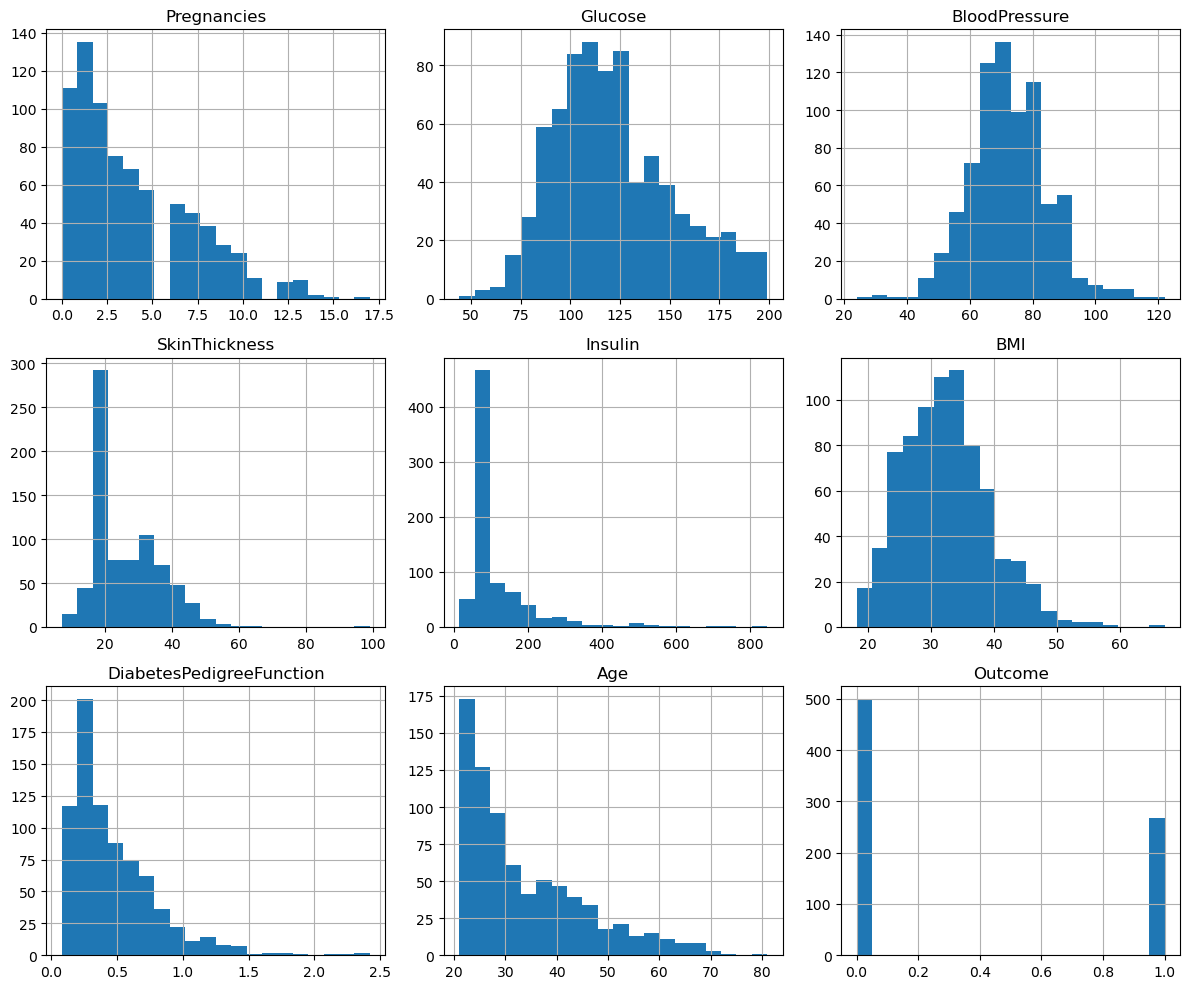

In [10]:
col = list(df1.columns)
df1[col].hist(stacked = True, bins = 20, figsize = (12,10), layout = (3,3))
plt.tight_layout()

Upon initial inspection, the majority of distributions appear to have positive skewness, with glucose and blood pressure distributions closest to normal. There are few outliers for each parameter. Hence, z-score values will be used to remove the outliers.

In [11]:
z = np.abs(stats.zscore(df1))
print(z)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865276       0.021044       0.872057  0.417768  0.167255   
1       0.844885  1.205989       0.516583       0.248678  0.417768  0.851535   
2       1.233880  2.015979       0.681762       0.630654  0.417768  1.331821   
3       0.844885  1.074480       0.516583       0.374700  0.265107  0.633222   
4       1.141852  0.503626       2.663916       0.872057  0.530423  1.549899   
..           ...       ...            ...            ...       ...       ...   
763     1.827813  0.679954       0.309315       2.222711  0.659428  0.065376   
764     0.547919  0.010468       0.186224       0.040885  0.417768  0.632988   
765     0.342981  0.022409       0.021044       0.374700  0.071599  0.909751   
766     0.844885  0.141977       1.012121       0.630654  0.417768  0.342140   
767     0.844885  0.942972       0.186224       0.456471  0.417768  0.298477   

     DiabetesPedigreeFunction       Age

We see that the z-scores in our sample range from -3 to 3. As a result, we choose 3 as the threshold number for identifying and eliminating outliers.

In [12]:
df1 = df1[(z < 3).all(axis=1)]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               718 non-null    int64  
 1   Glucose                   718 non-null    float64
 2   BloodPressure             718 non-null    float64
 3   SkinThickness             718 non-null    float64
 4   Insulin                   718 non-null    float64
 5   BMI                       718 non-null    float64
 6   DiabetesPedigreeFunction  718 non-null    float64
 7   Age                       718 non-null    int64  
 8   Outcome                   718 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.1 KB


## 4. Exploratory Analysis and Data Visualization

During the project's exploratory research and data visualisation phase, we will use several plots to identify first trends and patterns in the data. Specifically, we will create separate plots for each variable in the dataframe to identify associations with an individual's diabetes testing results.

### 4.1 Horizontal Bar Plot

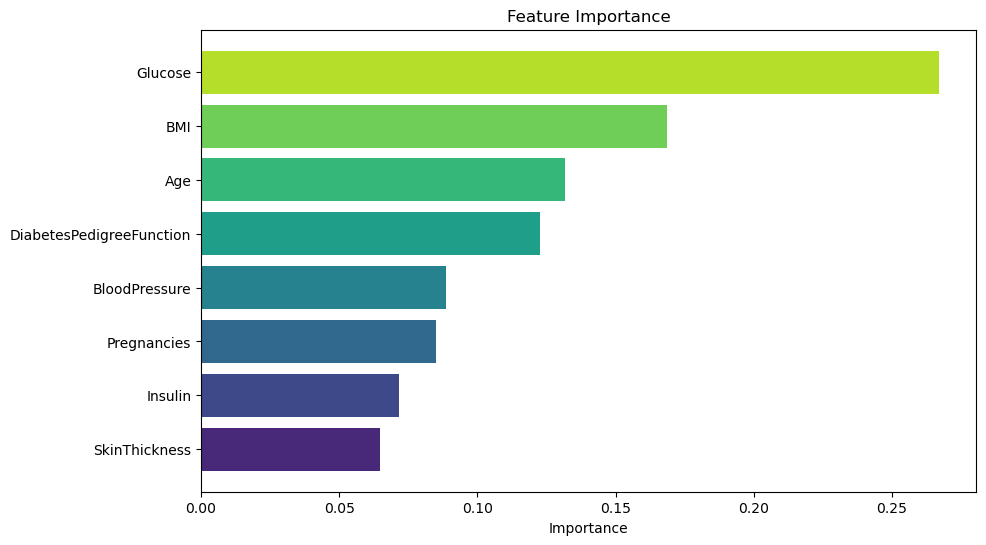

In [14]:
# Feature selection using RandomForestClassifier

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
clf.fit(X, y)

# Get feature importances from the model
feature_importances = clf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Use a colorful palette for the bars
colors = sns.color_palette('viridis', len(feature_importance_df))

# Plot the feature importances with colorful bars
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

### 4.2 Heatmap

<Axes: >

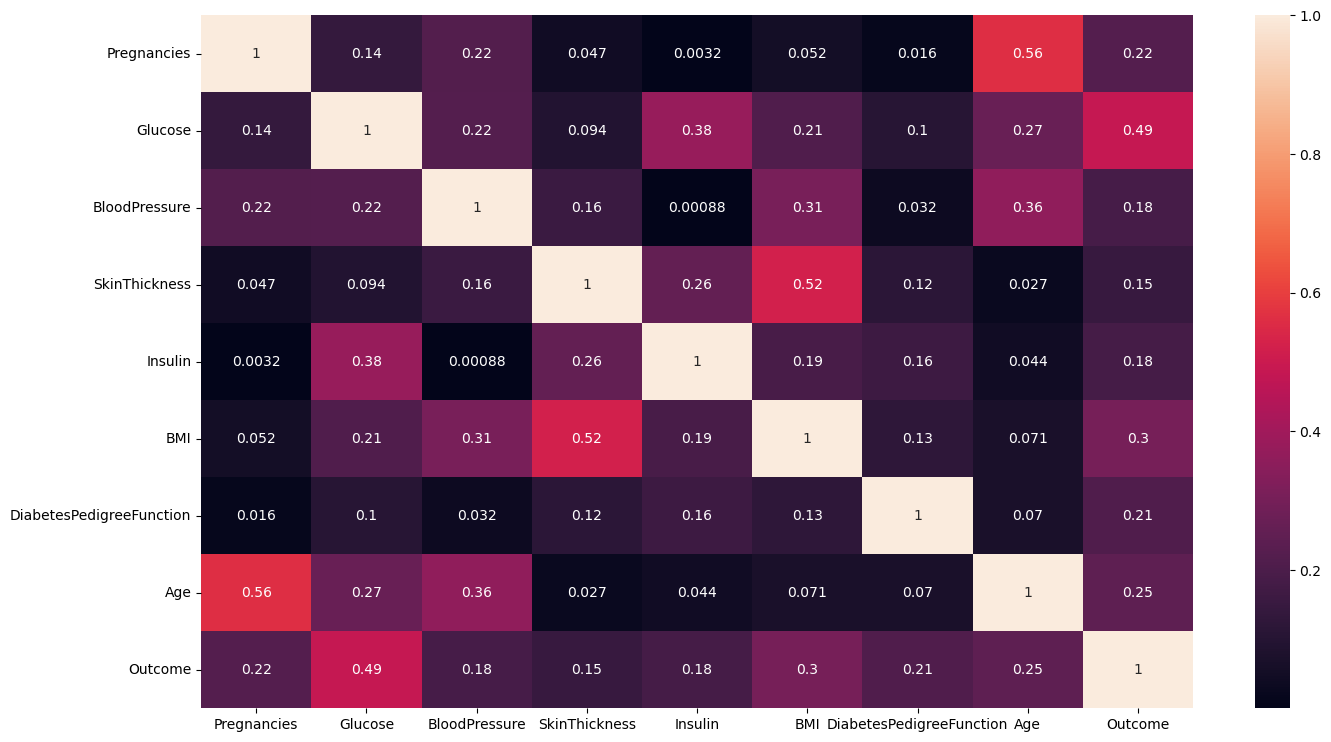

In [15]:
corr = df1.corr()
plt.figure(figsize = (16, 9))
sns.heatmap(corr, annot = True)

Age has the most significant positive association with Pregnancies. This observation is supported by the pairplot shown below to show that other variables do not display strong correlation with each other.

### 4.3 Pairplot

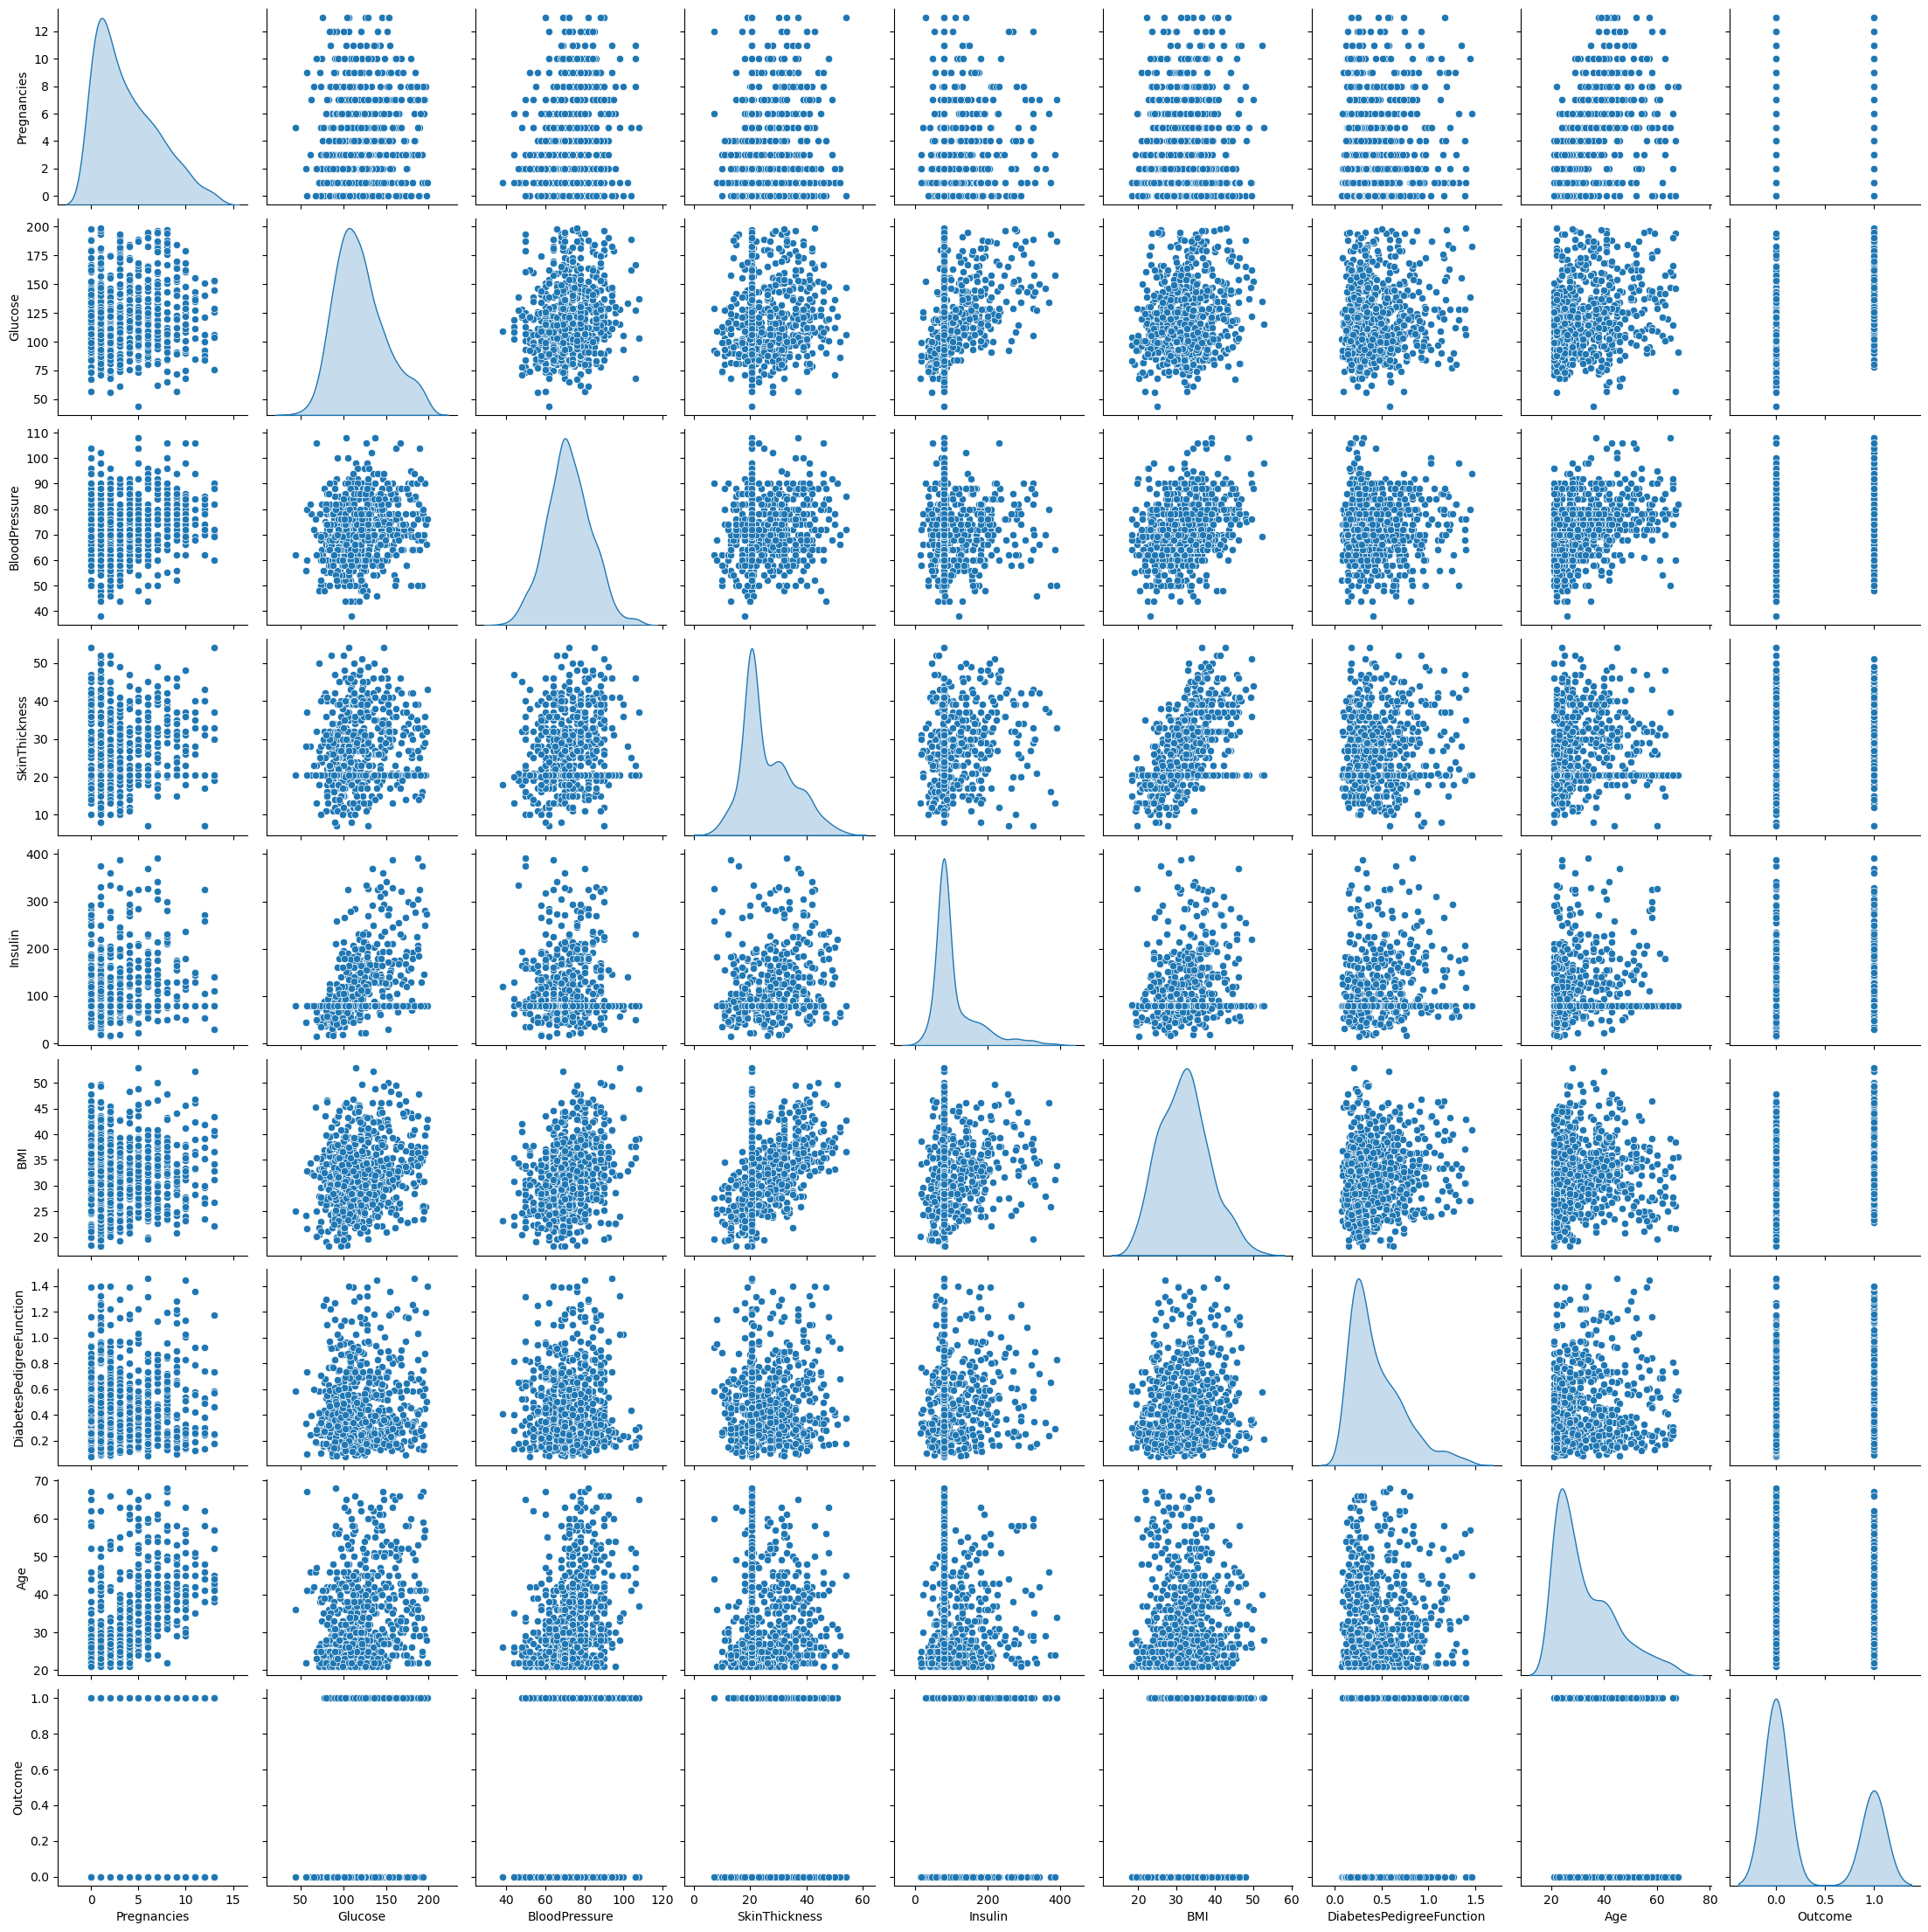

In [16]:
sns.pairplot(df1,diag_kind='kde');

The kde plots show that glucose and blood pressure are the only parameters that most closely reflect a normal distribution in which the majority of the parameters are positively skewed.

Another pairplot will be drawn to examine which parameters may have a larger link with the outcomes of diabetic patients and non-diabetic patients.

In [17]:
df_cr = df1.copy()

df_cr['Outcome'].astype('category')
df_cr['Outcome'].replace(0, "Non-diabetic", inplace = True)
df_cr['Outcome'].replace(1, "Diabetic", inplace = True)

sns.pairplot(df_cr, hue = 'Outcome', diag_kind = 'kde');

Unfortunately, the presented pairplots do not clearly illustrate a strong association between the required parameters and the outcome, with the exception of glucose, which does show a significant relationship—higher glucose levels correspond to an increased risk of diabetes. Furthermore, as stated in section 4.1, BMI and age were recognised as the second and third most important features, respectively, with glucose being the top-ranking feature, as supported by sections 4.1, 4.2 and 4.3.

To support this conclusion, we can look at the correlation matrix between Outcome and the variables Glucose, BMI, and Age.

### Hypothesis Testing
This hypothesis testing would test the correlation between Glucose, BMI, and Age with the target outcome.

In [18]:
#Setting 5% as the significance level
alpha = 0.05

def hypothesis_test(p_value):
    if p_value < alpha:
        print ("p-value is ",p_value," which is lower than the significance level, alternative hypothesis is accepted.")
    else:
        print ("p-value is ",p_value," which is higher than the significance level, null hypothesis is not rejected.")

Pearson correlation test was conducted using stats.pearsonr

Null Hypothesis: Both sets of feature are uncorrelated. <br>
Alternative Hypothesis: Both sets of feature are somewhat correlated.

#### Glucose and Outcome

In [19]:
s1, p1 = stats.pearsonr(df1['Glucose'],df1['Outcome'])

hypothesis_test(p1)
print("The correlation coefficient between Glucose and the Dependent Variable is: " + str(round(s1,4)))

p-value is  3.0634643077287735e-44  which is lower than the significance level, alternative hypothesis is accepted.
The correlation coefficient between Glucose and the Dependent Variable is: 0.488


#### BMI and Outcome

In [20]:
s1, p1 = stats.pearsonr(df1['BMI'],df1['Outcome'])

hypothesis_test(p1)
print("The correlation coefficient between BMI and the Dependent Variable is: " + str(round(s1,4)))

p-value is  8.816480177147163e-17  which is lower than the significance level, alternative hypothesis is accepted.
The correlation coefficient between BMI and the Dependent Variable is: 0.3037


#### Age and Outcome

In [21]:
s1, p1 = stats.pearsonr(df1['Age'],df1['Outcome'])

hypothesis_test(p1)
print("The correlation coefficient between Age and the Dependent Variable is: " + str(round(s1,4)))

p-value is  2.463510082654717e-11  which is lower than the significance level, alternative hypothesis is accepted.
The correlation coefficient between Age and the Dependent Variable is: 0.2457


### 4.4 Histograms

In the DataFrame, we will generate histograms that depict the distributions of factors specific to individuals who had negative diabetes findings.

In [22]:
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
sns.distplot(df_withoutdiabetes.Age, bins=10, color='skyblue', ax=ax[0, 0])
sns.distplot(df_withoutdiabetes.Pregnancies, bins=10, color='salmon', ax=ax[0, 1])
sns.distplot(df_withoutdiabetes.Glucose, bins=10, color='lightgreen', ax=ax[1, 0])
sns.distplot(df_withoutdiabetes.BloodPressure, bins=10, color='lightcoral', ax=ax[1, 1])
sns.distplot(df_withoutdiabetes.SkinThickness, bins=10, color='cornflowerblue', ax=ax[2, 0])
sns.distplot(df_withoutdiabetes.Insulin, bins=10, color='mediumorchid', ax=ax[2, 1])
sns.distplot(df_withoutdiabetes.DiabetesPedigreeFunction, bins=10, color='lightpink', ax=ax[3, 0])
sns.distplot(df_withoutdiabetes.BMI, bins=10, color='lightseagreen', ax=ax[3, 1])

<Axes: xlabel='BMI', ylabel='Density'>

In the DataFrame, we will generate histograms that depict the distributions of factors specific to individuals who had positive diabetes findings.

<Axes: xlabel='BMI', ylabel='Density'>

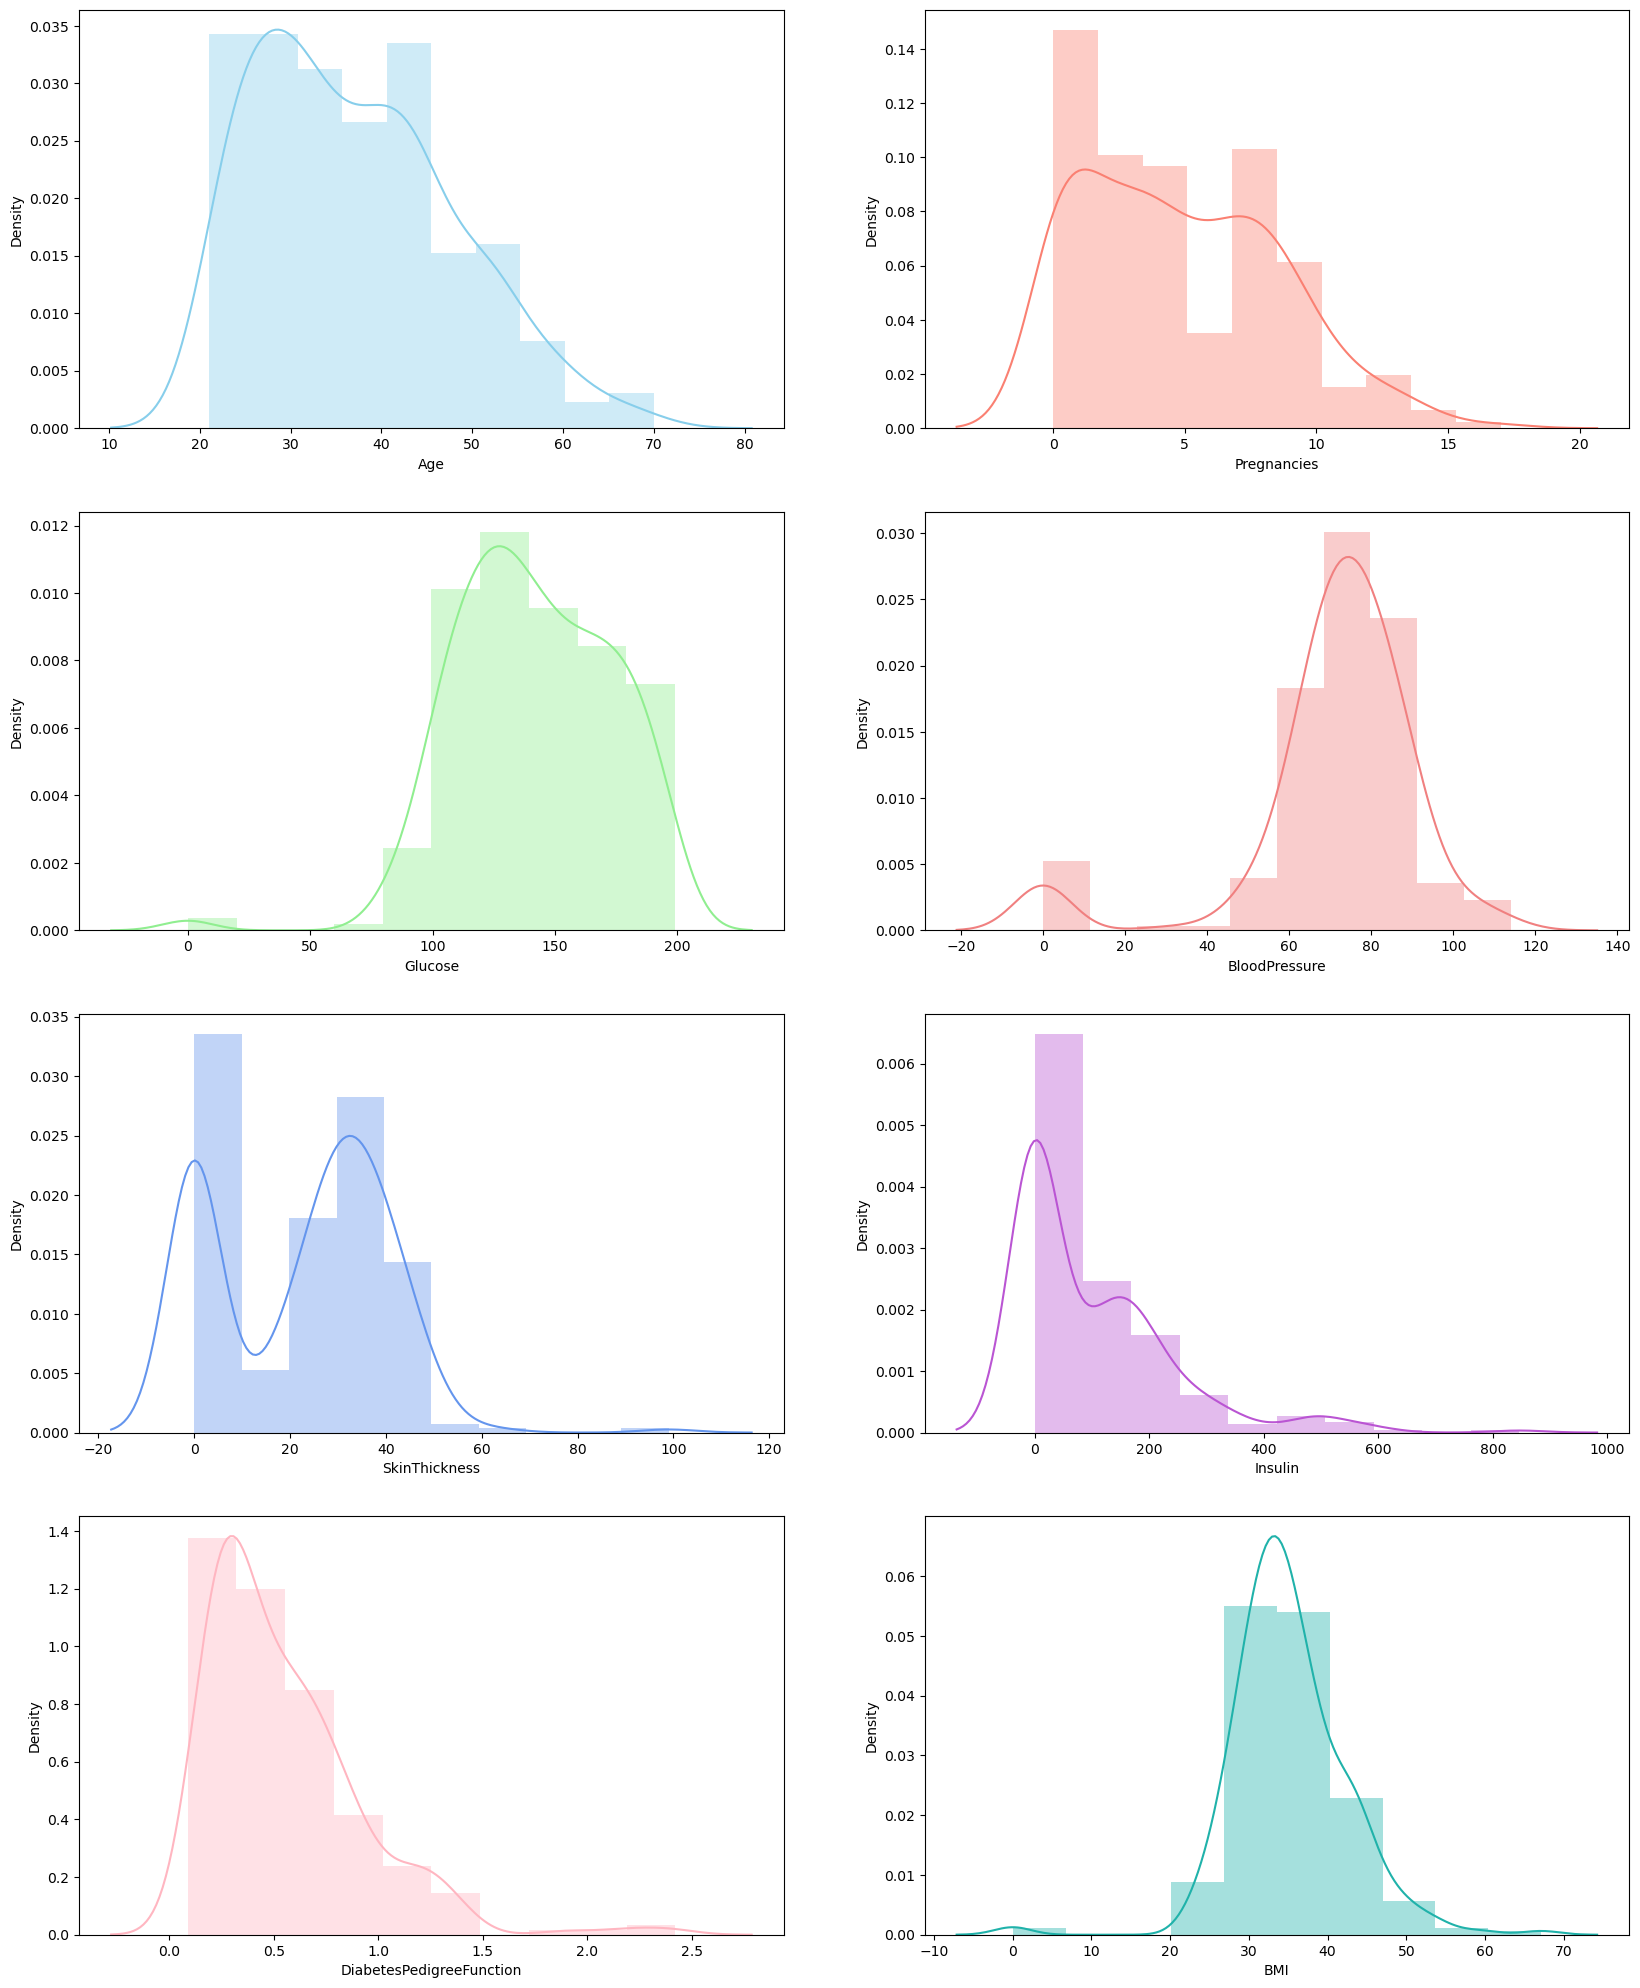

In [23]:
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
sns.distplot(df_diabetes.Age, bins=10, color='skyblue', ax=ax[0, 0])
sns.distplot(df_diabetes.Pregnancies, bins=10, color='salmon', ax=ax[0, 1])
sns.distplot(df_diabetes.Glucose, bins=10, color='lightgreen', ax=ax[1, 0])
sns.distplot(df_diabetes.BloodPressure, bins=10, color='lightcoral', ax=ax[1, 1])
sns.distplot(df_diabetes.SkinThickness, bins=10, color='cornflowerblue', ax=ax[2, 0])
sns.distplot(df_diabetes.Insulin, bins=10, color='mediumorchid', ax=ax[2, 1])
sns.distplot(df_diabetes.DiabetesPedigreeFunction, bins=10, color='lightpink', ax=ax[3, 0])
sns.distplot(df_diabetes.BMI, bins=10, color='lightseagreen', ax=ax[3, 1])

## 4.5 Analyzing Different Columns in the Dataset 
### 4.5.1 Glucose

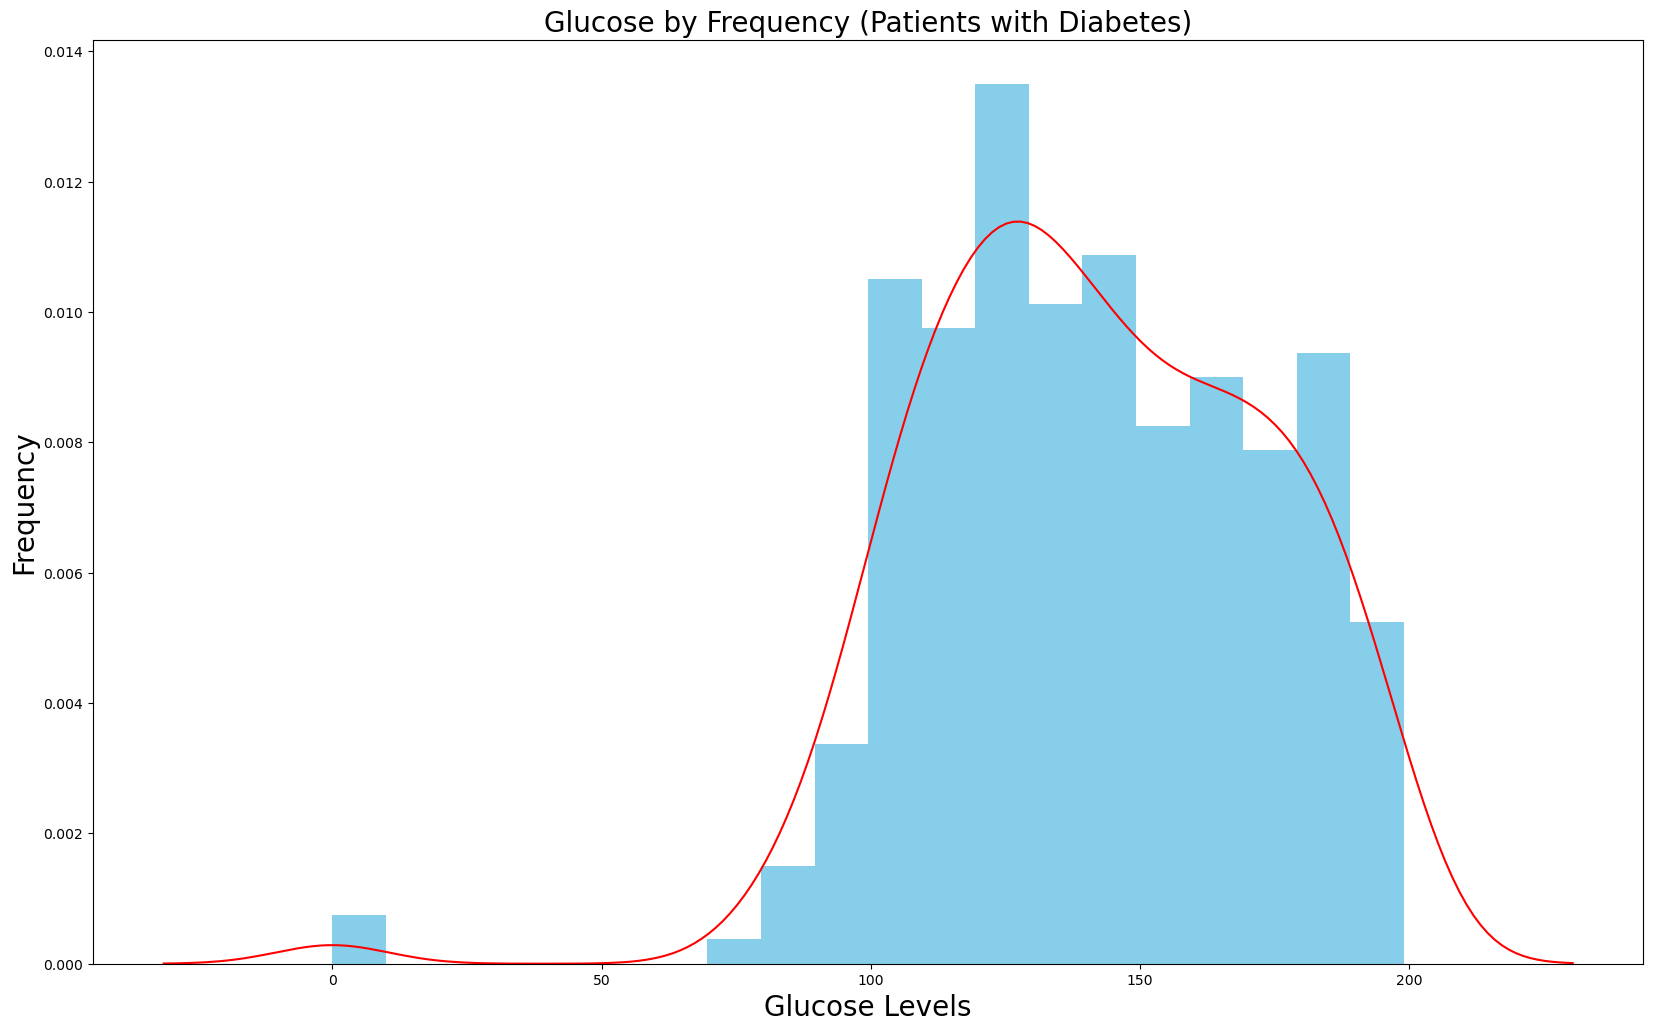

In [24]:
plt.figure(figsize=(20, 12))
plt.hist(df_d    st.write("**Insulin:** \n"
             "\n    It doesn't exert a significant influence on diabetes.")iabetes['Glucose'], histtype='stepfilled', bins=20, color='skyblue', density=True)

sns.kdeplot(df_diabetes['Glucose'], color='red')

plt.title('Glucose by Frequency (Patients with Diabetes)', size=20)
plt.ylabel('Frequency', size=20)
plt.xlabel('Glucose Levels', size=20)

plt.show()

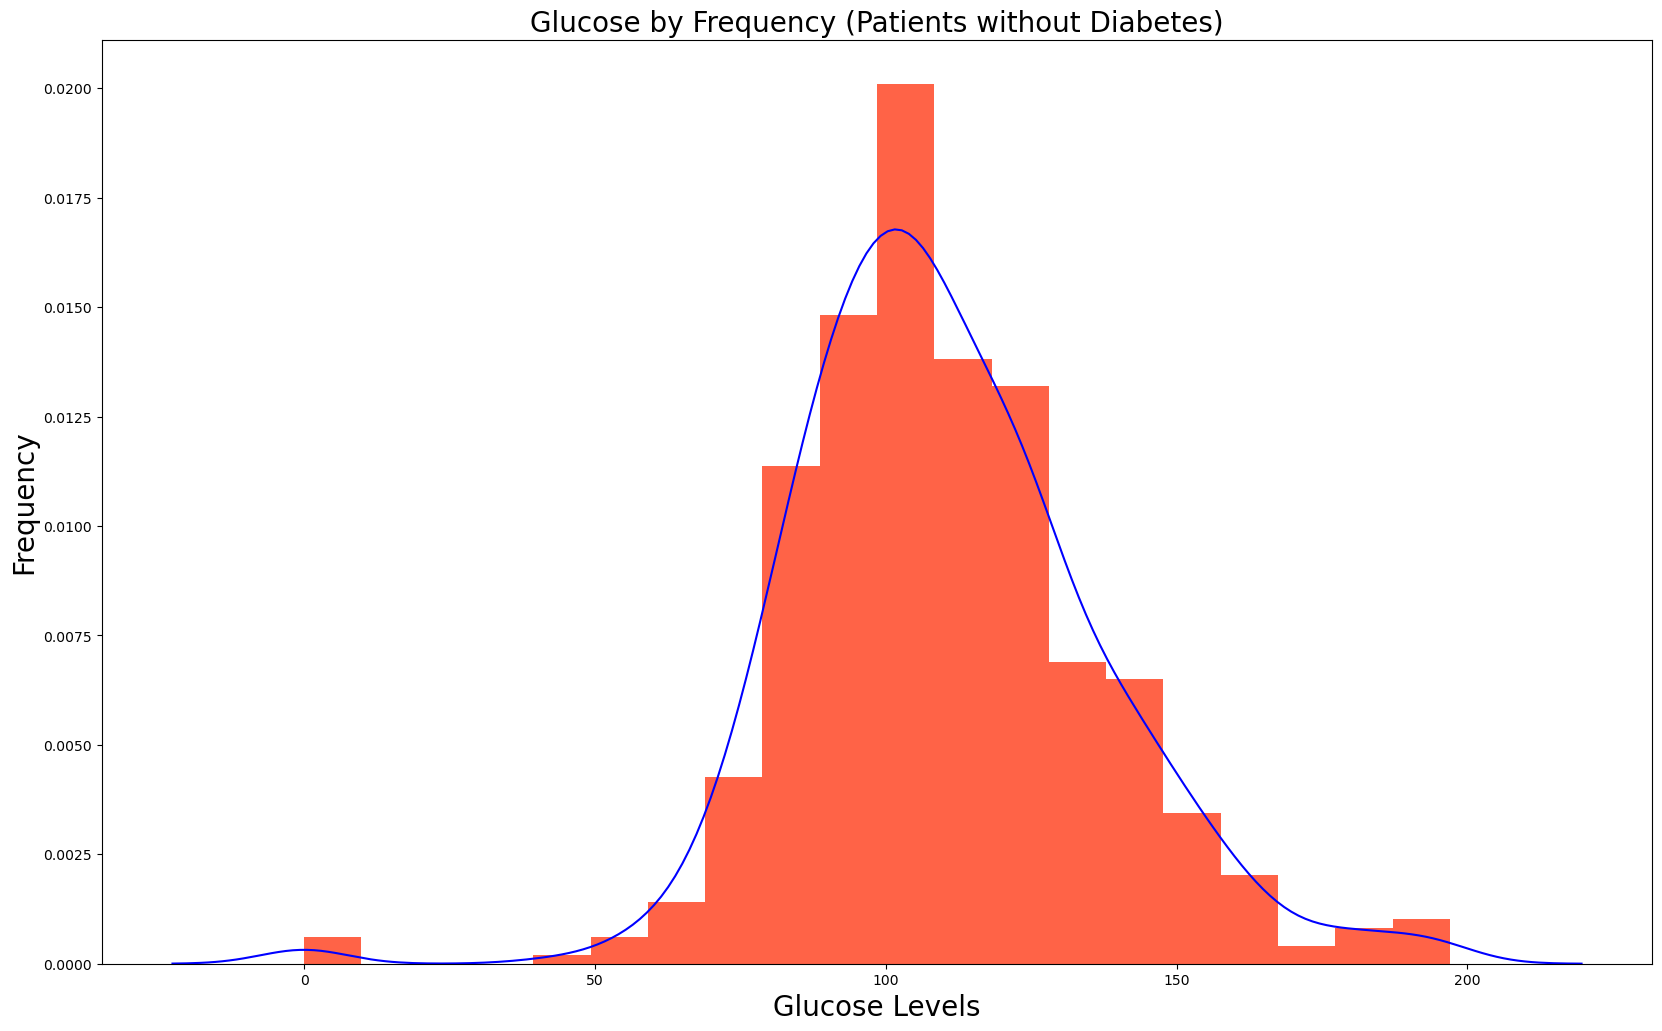

In [25]:
plt.figure(figsize=(20, 12))
plt.hist(df_withoutdiabetes['Glucose'], histtype='stepfilled', bins=20, color='tomato', density=True)

sns.kdeplot(df_withoutdiabetes['Glucose'], color='blue')

plt.title('Glucose by Frequency (Patients without Diabetes)', size=20)
plt.ylabel('Frequency', size=20)
plt.xlabel('Glucose Levels', size=20)

plt.show()

Most patients who test negative for diabetes have glucose levels ranging from 100 to 105, after which the frequency drops dramatically. In contrast, diabetics have higher glucose levels, with the majority falling between 100 and 125.

### 4.5.2 Age

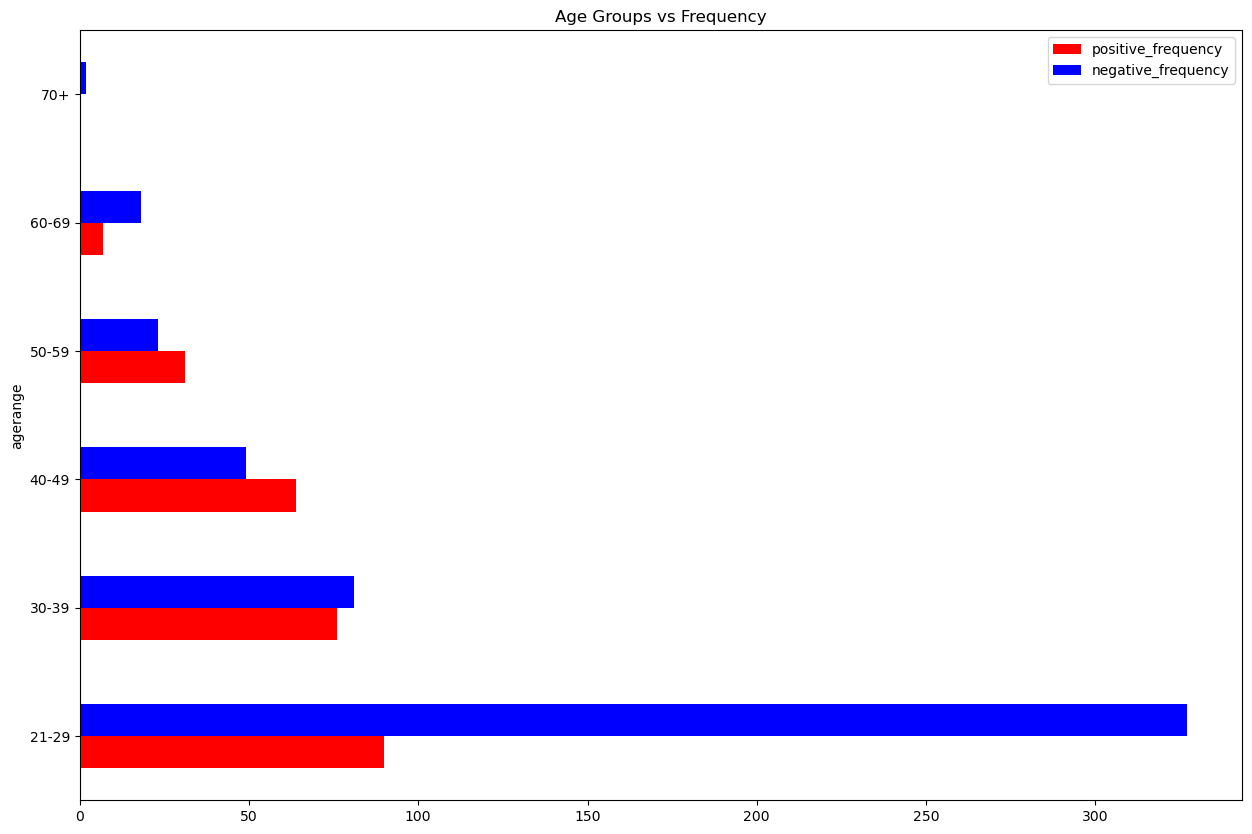

In [26]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['21-29', '30-39', '40-49', '50-59', '60-69', '70+']

df1['agerange'] = pd.cut(df1.Age, bins, labels=labels, include_lowest=True)
df_diabetes['agerange'] = pd.cut(df_diabetes.Age, bins, labels=labels, include_lowest=True)
df_withoutdiabetes['agerange'] = pd.cut(df_withoutdiabetes.Age, bins, labels=labels, include_lowest=True)

age_groups_positive = df_diabetes.groupby('agerange').size().reset_index(name='positive_frequency')
age_groups_negative = df_withoutdiabetes.groupby('agerange').size().reset_index(name='negative_frequency')

age_frame_combined = pd.merge(age_groups_positive, age_groups_negative, on='agerange', how='outer')

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Age Groups vs Frequency')
age_frame_combined.plot.barh(x='agerange', y=['positive_frequency', 'negative_frequency'], ax=ax, color=['red', 'blue'])
plt.show()

It is evident that the age group with the most people tested for diabetes was 21-29; however, we cannot infer this just yet because the age range of 21-29 also had the highest frequency. As a result, the next section estimates the ratio of positive instances discovered to the total number of cases in each age group.

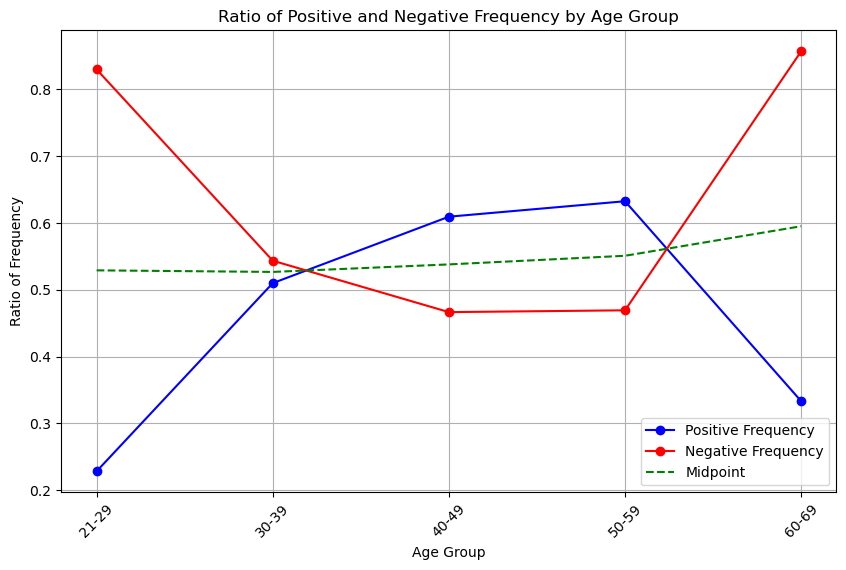

In [27]:
age_groups = df1.groupby('agerange').size().reset_index(name='frequency')
age_groups_positive = df_diabetes.groupby('agerange').size().reset_index(name='positive_frequency')

age_frame = pd.merge(age_groups, age_groups_positive, on='agerange', how='left')
age_frame['ratio'] = age_frame['positive_frequency'] / age_frame['frequency']

age_groups_2 = df1.groupby('agerange').size().reset_index(name='frequency')
age_groups_negative = df_withoutdiabetes.groupby('agerange').size().reset_index(name='negative_frequency')

age_frame_2 = pd.merge(age_groups_2, age_groups_negative, on='agerange', how='left')
age_frame_2['ratio'] = age_frame_2['negative_frequency'] / age_frame_2['frequency']

age_frame['symmetrical_ratio'] = (age_frame['ratio'] + age_frame_2['ratio']) / 2

plt.figure(figsize=(10, 6))
plt.plot(age_frame['agerange'], age_frame['ratio'], marker='o', color='blue', label='Positive Frequency')
plt.plot(age_frame_2['agerange'], age_frame_2['ratio'], marker='o', color='red', label='Negative Frequency')
plt.plot(age_frame['agerange'], age_frame['symmetrical_ratio'], linestyle='--', color='green', label='Midpoint')
plt.xlabel('Age Group')
plt.ylabel('Ratio of Frequency')
plt.title('Ratio of Positive and Negative Frequency by Age Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

The line chart above shows an increased trend in the ratio of positive cases to total cases, with the largest ratio happening in the 50-59 age range. As a result, we can conclude that those between the ages of 50 and 59 are most likely to get diabetes. Furthermore, as people become older, their chances of developing diabetes increase, as evidenced by the rising of positive trend of from the 21-29 age group to the 50-59 age group. Finally, we can conclude that age is directly proportional to the risk of developing diabetes.

### 4.5.3 Insulin

In [28]:
df_positive = df1[(df1['Outcome'] == 1)]
df_negative = df1[(df1['Outcome'] == 0)]

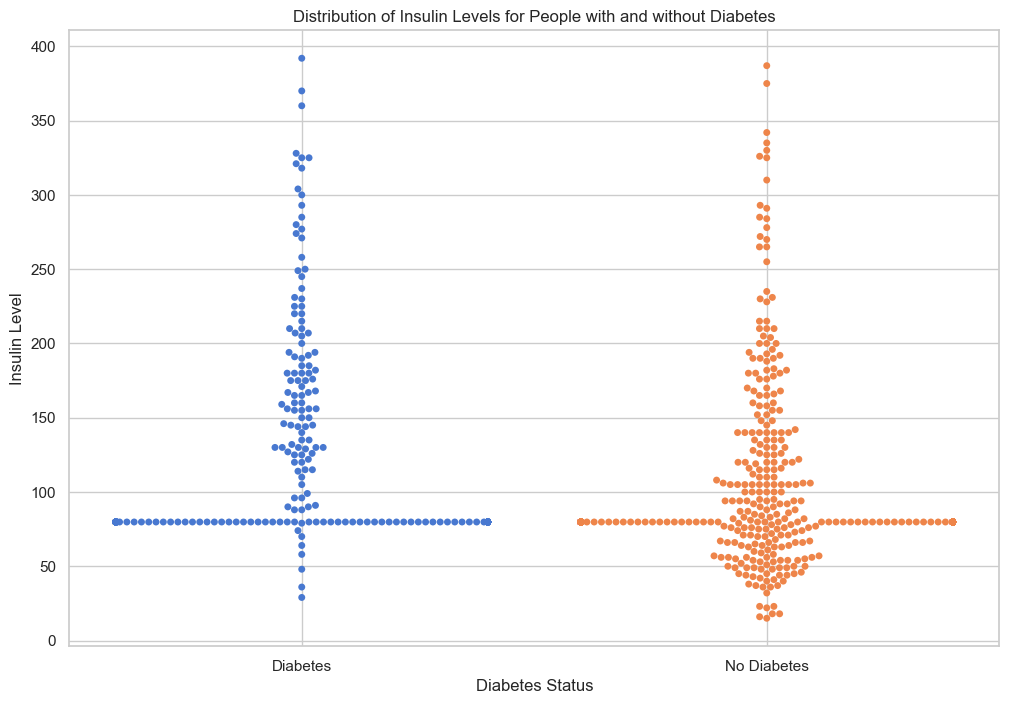

In [29]:
sns.set(style="whitegrid")

df_combined = pd.concat([df_positive.assign(Diabetes='Diabetes'), 
                         df_negative.assign(Diabetes='No Diabetes')])

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Diabetes', y='Insulin', data=df_combined, palette="muted")
plt.title('Distribution of Insulin Levels for People with and without Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Insulin Level')
plt.grid(True)
plt.show()

The swarm plot does not clearly show how insulin levels link to diabetes state which is proven in section 4.1 and 4.2. As a result, it is difficult to claim that insulin levels have a direct effect on diabetes. The plot demonstrates that both diabetics and non-diabetics are most clustered around an insulin level of about 80. Thus, it's difficult to draw a direct correlation between insulin levels and diabetes based solely on the visualization.

### 4.5.4 Skin Thickness

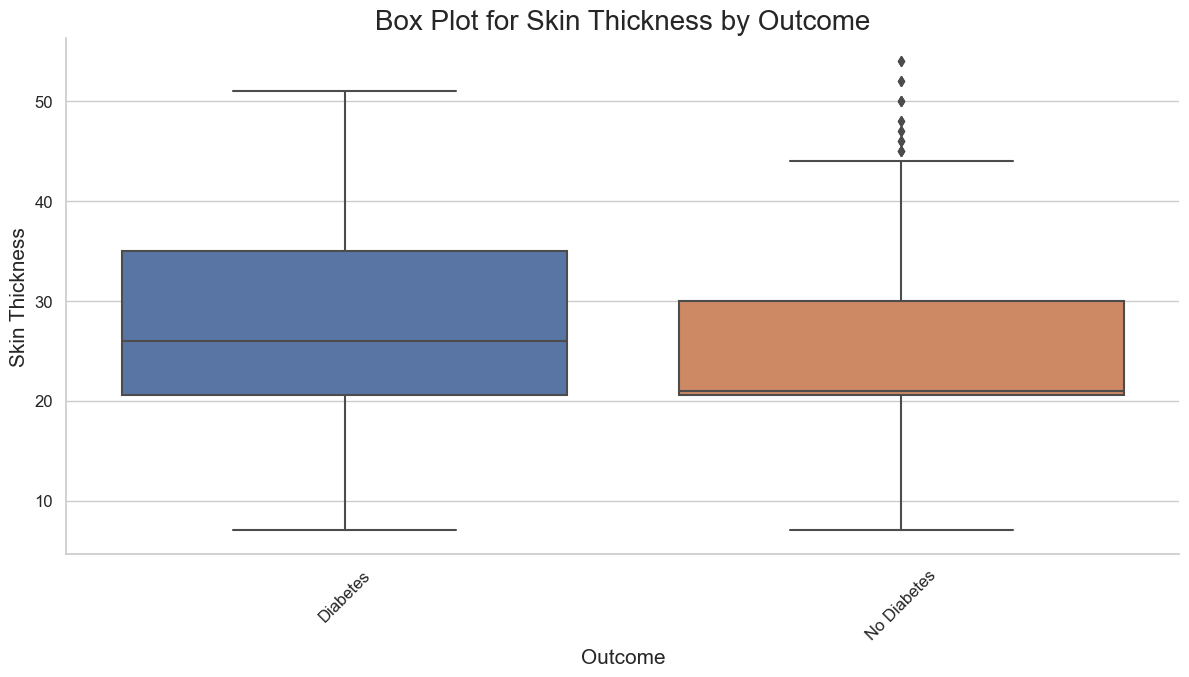

In [30]:
df1['Outcome'] = df1['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

sns.catplot(x="Outcome", y="SkinThickness", data=df1, kind='box', height=6, aspect=2)
plt.title('Box Plot for Skin Thickness by Outcome', size=20)
plt.ylabel('Skin Thickness', size=15)
plt.xlabel('Outcome', size=15)
plt.xticks(size=12, rotation=45) 
plt.yticks(size=12) 
plt.show()

The box plot indicates that individuals with diabetes generally exhibit slightly thicker skin compared to those without diabetes.

### 4.5.5 Pregnancies

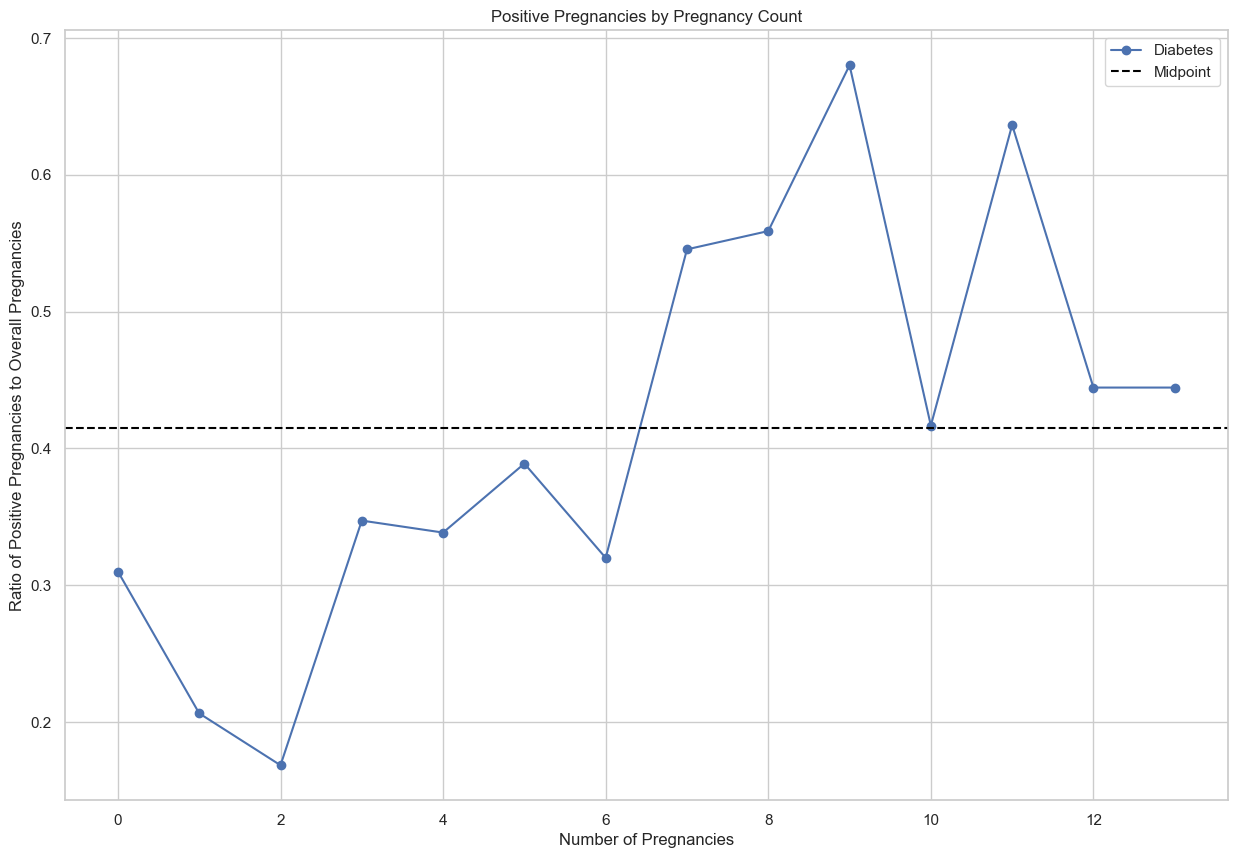

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))

pregnancy_groups = df1.groupby('Pregnancies')
df_pregnancies = pd.DataFrame(pregnancy_groups.size()).reset_index()
df_pregnancies.columns = ['Pregnancies', 'Overall']

pregnancy_groups_positive = df_positive.groupby('Pregnancies')
df_pregnancies_positive = pd.DataFrame(pregnancy_groups_positive.size()).reset_index()
df_pregnancies_positive.columns = ['Pregnancies', 'Positive']

df_merged = pd.merge(df_pregnancies, df_pregnancies_positive, on='Pregnancies', how='left')
df_merged['Positive'] = df_merged['Positive'].fillna(0)

df_merged['Diabetes'] = df_merged['Positive'] / df_merged['Overall']

ax.set_title('Positive Pregnancies by Pregnancy Count')
df_merged.plot(x='Pregnancies', y='Diabetes', ax=ax, marker='o')

plt.xlabel('Number of Pregnancies')
plt.ylabel('Ratio of Positive Pregnancies to Overall Pregnancies')
plt.grid(True)

midpoint = df_merged['Diabetes'].mean()

plt.axhline(y=midpoint, color='black', linestyle='--', label='Midpoint')
plt.legend()

plt.show()

## 5. Machine Learning Algorithms

So, in this section, we'll choose the model or technique that works best for the dataset at hand. We will test various models, including Logistic Regression, Gaussian Naïve Bayes, K Neighbours Classifier, Support Vector Machine, Decision Tree, Random Forest, Bagging Classifier, AdaBoost Classifier, Gradient Boosting Classifier, and Linear Discriminant Analysis (LDA), to determine the most accurate predictor of a patient's diabetes status.

### 5.1 Dataset Preparation

In [32]:
X = df.drop(['Outcome'],axis = 1)
Y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 60)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Confusion Matrix Function

In [34]:
def conf_mtx(y_act,y_pred):
    cm=metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Diabetic","Non-Diabetic"]],
                  columns = [i for i in ["Predict for Diabetic","Predict for Non-Diabetic"]])
    plt.figure(figsize = (6,6))
    plt.title("Confusion Matrix")
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    Score_Accuracy = "%.2f%%" %(metrics.accuracy_score(y_act,y_pred)*100)
    Score_Recall = "%.2f%%" %(metrics.recall_score(y_act,y_pred)*100)
    Score_Precision = "%.2f%%" %(metrics.precision_score(y_act,y_pred)*100)
    
    print("Model Accuracy Score: " + Score_Accuracy)
    print("Model Recall Score: " + Score_Recall)
    print("Model Precision Score: " + Score_Precision)
    
    return Score_Accuracy,Score_Recall,Score_Precision

In [35]:
summary_of_models = pd.DataFrame(columns=('Model', 'Training Accuracy', 'Test Accuracy Score','Test Recall Score', 'Test Precision Score', 'AUC Score'))

In [36]:
def ML_test(Mdl,Param_grid):
    if bool(Param_grid):
        Mdl = GridSearchCV(Mdl,Param_grid,cv=10)
        Mdl.fit(X_train_scaled,y_train)
        Mdl_params = Mdl.best_params_
        Mdl_train_sc = Mdl.cv_results_['mean_test_score'].mean()
        Mdl_test_sc = Mdl.score(X_test_scaled,y_test)
        probas = Mdl.predict_proba(X_test_scaled)
        
    else:
        Mdl = Mdl
        Mdl.fit(X_train_scaled,y_train)
        Mdl_train_sc = round(Mdl.score(X_train_scaled,y_train),4)
        Mdl_test_sc = round(Mdl.score(X_test_scaled,y_test),4)
        probas = Mdl.predict_proba(X_test_scaled)
    
    y_pred = Mdl.predict(X_test_scaled)
    
    print("Training score is: " + str(Mdl_train_sc))
    print("Test Mean score is: " + str(Mdl_test_sc))  
    
    Score_Accuracy,Score_Recall,Score_Precision = conf_mtx(y_test,y_pred)
    Mdl_train_sc = "%.2f%%" % (Mdl_train_sc*100)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = round(auc(fpr, tpr),4)
    print("AUC : " + str(roc_auc))
    
    return Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc

Training score is: 0.7689569011105235
Test Mean score is: 0.7857142857142857
Model Accuracy Score: 78.57%
Model Recall Score: 60.78%
Model Precision Score: 70.45%
AUC : 0.8477


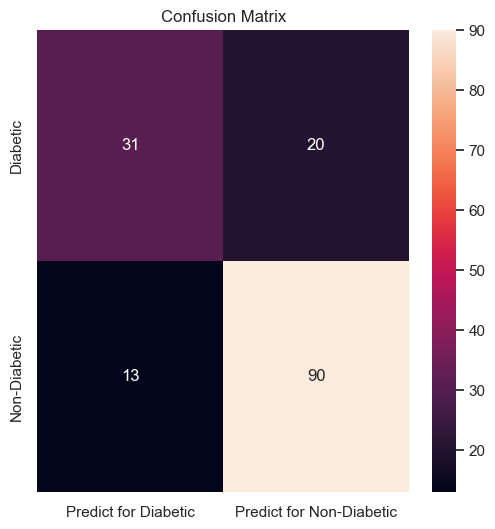

In [37]:
# Logistic Regression Model

Mdl_LogReg = LogisticRegression(solver="liblinear")

model_name = "LogisticRegression"
Param_grid_LogReg =  {'penalty': ['l1','l2'], 'C': np.linspace(0.1,1.1,10)}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl_LogReg,Param_grid_LogReg)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc},
                         ignore_index=True)

In [38]:
# Gaussian Naive Bayes Model

Mdl = GaussianNB()

model_name = "GaussianNB"

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid={})

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc},
                         ignore_index=True)

Training score is: 0.7671
Test Mean score is: 0.7727
Model Accuracy Score: 77.27%
Model Recall Score: 66.67%
Model Precision Score: 65.38%
AUC : 0.8424


Training score is: 0.7252511898466419
Test Mean score is: 0.7467532467532467
Model Accuracy Score: 74.68%
Model Recall Score: 62.75%
Model Precision Score: 61.54%
AUC : 0.7981


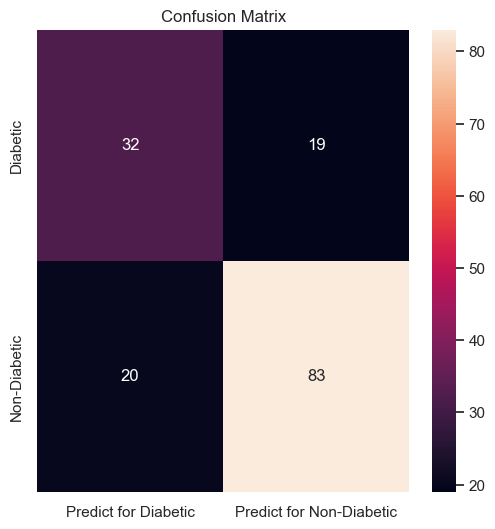

In [39]:
# K Neighbours Classifier Model

Mdl = KNeighborsClassifier()

model_name = "k-Nearest Neighbours"
Param_grid_kNeigh =  {'n_neighbors': list(np.arange(3,8)), 'metric': ['euclidean','manhattan','chebyshev','minkowski']}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_kNeigh)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc}, \
                         ignore_index=True)

In [40]:
# Support Vector Machine Model

Mdl = SVC(probability=True)

model_name = "Support Vector Machine"
Param_grid_SVC =  {'C': np.linspace(0.1,1.1,10), 'kernel': ['linear','poly','rbf',]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_SVC)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc}, 
                         ignore_index=True)

Training score is: 0.7513705270579939
Test Mean score is: 0.7857142857142857
Model Accuracy Score: 78.57%
Model Recall Score: 58.82%
Model Precision Score: 71.43%
AUC : 0.8519


In [41]:
# Decision Tree Model

Mdl = DecisionTreeClassifier(random_state=1)

model_name = "DecisionTreeClassifier"
Param_grid_dt = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_dt)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc}, 
                         ignore_index=True)

Training score is: 0.7274145073153537
Test Mean score is: 0.7532467532467533
Model Accuracy Score: 75.32%
Model Recall Score: 58.82%
Model Precision Score: 63.83%
AUC : 0.7975


Training score is: 0.7590234443856865
Test Mean score is: 0.7792207792207793
Model Accuracy Score: 77.92%
Model Recall Score: 64.71%
Model Precision Score: 67.35%
AUC : 0.8494


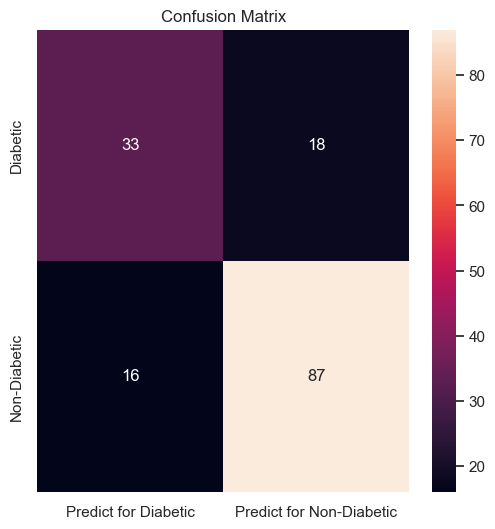

In [42]:
# Random Forest Model

Mdl = RandomForestClassifier(random_state=1,n_estimators=100)

model_name = "RandomForestClassifier"
Param_grid_rf = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_rf)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc},
                         ignore_index=True)

Training score is: 0.7579111581173982
Test Mean score is: 0.7662337662337663
Model Accuracy Score: 76.62%
Model Recall Score: 60.78%
Model Precision Score: 65.96%
AUC : 0.8502


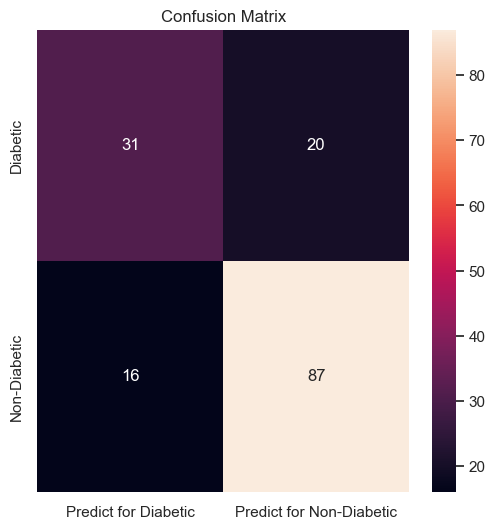

In [43]:
# Bagging Classifier

Mdl = BaggingClassifier(n_estimators=100, bootstrap=True)

model_name = "BaggingClassifier"
Param_grid_bc = {'max_samples': list(np.arange(0.1,1.1,0.1))}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_bc)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc}, 
                         ignore_index=True)

In [44]:
# AdaBoost Classifier

Mdl = AdaBoostClassifier( n_estimators= 100)

model_name = "AdaBoostClassifier"
Param_grid_abc = {'learning_rate': list(np.arange(0.1,1.1,0.1))}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_abc)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc}, 
                         ignore_index=True)

Training score is: 0.7569275515600211
Test Mean score is: 0.7402597402597403
Model Accuracy Score: 74.03%
Model Recall Score: 64.71%
Model Precision Score: 60.00%
AUC : 0.814


Training score is: 0.7533879781420764
Test Mean score is: 0.7597402597402597
Model Accuracy Score: 75.97%
Model Recall Score: 68.63%
Model Precision Score: 62.50%
AUC : 0.8205


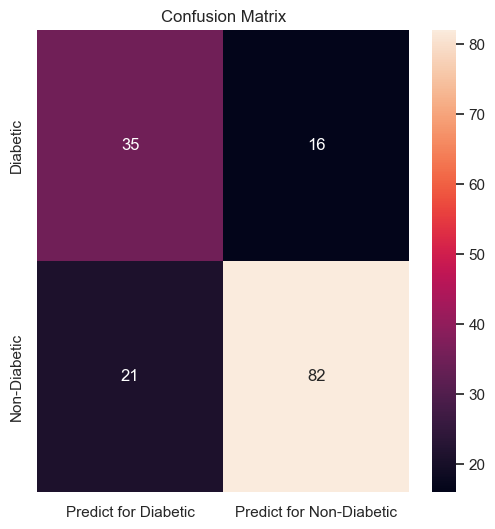

In [45]:
# GradientBoosting Classifier

Mdl = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1)

model_name = "GradientBoostingClassifier"
Param_grid_gbc = {'max_depth': [3, 4, 5, 6, 7, 8],'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_gbc)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc}, 
                         ignore_index=True)

Training score is: 0.772
Test Mean score is: 0.7792
Model Accuracy Score: 77.92%
Model Recall Score: 58.82%
Model Precision Score: 69.77%
AUC : 0.8449


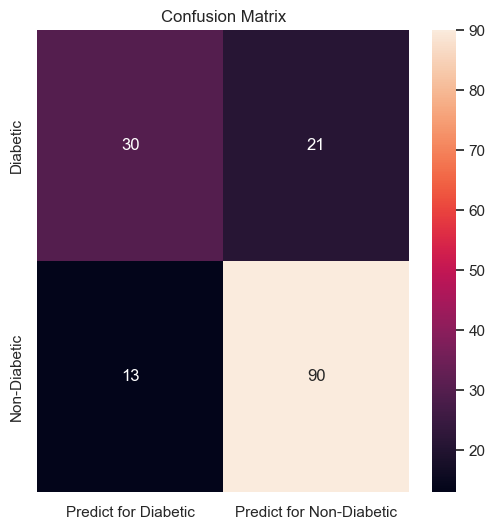

In [46]:
# Linear Discriminant Analysis

Mdl = LinearDiscriminantAnalysis()

model_name = "LinearDiscriminantAnalysis"
param_grid_lda = {}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl, param_grid_lda)

summary_of_models = summary_of_models.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC Score': roc_auc}, 
                         ignore_index=True)

## 6. Comparative Analysis

In [47]:
summary_of_models

Model Training Accuracy Test Accuracy Score  \
0          LogisticRegression            76.90%              78.57%   
1                  GaussianNB            76.71%              77.27%   
2        k-Nearest Neighbours            72.53%              74.68%   
3      Support Vector Machine            75.14%              78.57%   
4      DecisionTreeClassifier            72.74%              75.32%   
5      RandomForestClassifier            75.90%              77.92%   
6           BaggingClassifier            75.79%              76.62%   
7          AdaBoostClassifier            75.69%              74.03%   
8  GradientBoostingClassifier            75.34%              75.97%   
9  LinearDiscriminantAnalysis            77.20%              77.92%   

  Test Recall Score Test Precision Score  AUC Score  
0            60.78%               70.45%     0.8477  
1            66.67%               65.38%     0.8424  
2            62.75%               61.54%     0.7981  
3            58.82%               71.43%     0.8519  
4            58.82%               63.83%     0.7975  
5            64.71%               67.35%     0.8494  
6            60.78%               65.96%     0.8502  
7            64.71%               60.00%     0.8140  
8            68.63%               62.50%     0.8205  
9            58.82%               69.77%     0.8449

After comparing the performance of several algorithms, it appears that the Support Vector Machine produces the best results in my opinion.

## 7. Conclusion

#### Overall Findings That Cause Diabetes
1. Glucose Level (mg/dL):
    1. 120 - 130
    2. 140 - 150
2. Age Group:
    1. 50 - 59 (Highest)
    2. 40 - 49 (Second Highest)
3. Insulin:
    1. It doesn't exert a significant influence on diabetes.
4. Skin Thickness:
    1. Individuals with diabetes may exhibit a slightly thicker skin.
5. Pregnancies:
    1. Women with more than six pregnancies are more likely to develop diabetes.
    2. The most significant risk occurs in women with nine pregnancies, followed by those with eleven.

## 8. References
[1] https://www.healthline.com/health/difference-between-type-1-and-type-2-diabetes <br>
[2] https://www.diabetesresearchclinicalpractice.com/article/S0168-8227(19)31230-6/fulltext#secst005 <br>
[3] https://towardsdatascience.com/pima-indians-diabetes-prediction-knn-visualization-5527c154afff